<br>

<br>

<br>

# 🚀 **PREDICTING DIABETES** 🚀

**BOOSTING ALGORITHM (XGBOOST)**

<br>

## **INDEX**

- **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**
- **STEP 2: DATA EXPLORATION AND CLEANING**
- **STEP 3: UNIVARIATE VARIABLE ANALYSIS**
- **STEP 4: MULTIVARIATE VARIABLE ANALYSIS**
- **STEP 5: FEATURE ENGINEERING**
- **STEP 6: FEATURE SELECTION**
- **STEP 7: MACHINE LEARNING**
- **STEP 8: CONCLUSIONS**

<br>

### **STEP 1: PROBLEM DEFINITION AND DATA COLLECTION**

- 1.1. Problem Definition
- 1.2. Library Importing
- 1.3. Data Collection

**1.1. PROBLEM DEFINITION**

Diabetes is a chronic health condition that affects millions of people worldwide. Early detection and diagnosis of diabetes are crucial for effective management and prevention of complications. In this study, we aim to develop a predictive model that can accurately identify individuals at risk of developing diabetes based on a set of diagnostic measures. By leveraging a dataset from the National Institute of Diabetes and Digestive and Kidney Diseases.

**RESEARCH QUESTIONS**

**Feature Importance**
- Which diagnostic measures (e.g., glucose levels, BMI) are the strongest predictors of diabetes?
- How do the relative importance of these features compare?

**Feature Interactions**
- Are there significant interactions between diagnostic measures that influence diabetes risk?
- How do these interactions affect the predictive model?

**Clinical Implications**
- Can the model identify subgroups of patients with distinct risk profiles?
- How can the model be used to improve clinical decision-making and early intervention?

**Model Performance**
- How well does the **`BOOSTING ALGORITHM (XGBoost)`** generalize to new, unseen data?
- What is the impact of different hyperparameter settings on model performance?


**Methodology**
- **`Extreme Gradient Boosting`**
- XGBoost, or Extreme Gradient Boosting, is a powerful machine learning algorithm that is widely used for both classification and regression tasks. It's part of a family of algorithms known as gradient boosting machines.

**How does XGBoost work?**

- **Sequential Model Building**:  XGBoost constructs a model sequentially. It starts by building a simple model (like a decision tree) and then adds new models one by one.
- **Minimizing Loss**: Each new model is trained to correct the errors made by the previous models. It does this by minimizing a loss function, which measures how well the model fits the training data.
- **Regularization**: XGBoost incorporates regularization techniques to prevent overfitting. This helps the model generalize better to unseen data.
- **Parallel Processing**: XGBoost is designed to be highly efficient and can leverage multiple cores of a CPU or GPUs for parallel processing.


**`XGBoost` vs. `Random Forest` vs. `Decision Tree`**
- **Decision Tree**: A decision tree is a basic machine learning model that makes decisions by splitting the data based on certain conditions. It's a single tree-like model.
- **Random Forest**: A random forest is an ensemble method that combines multiple decision trees. Each tree in the forest is trained on a different subset of the data and features. The final prediction is made by averaging the predictions of all the trees.
- **XGBoost**: XGBoost is also an ensemble method, but it differs from random forest in several ways:
    - **Sequential vs. Parallel**: Random forest builds trees independently, while XGBoost builds trees sequentially.
    - **Optimization**: XGBoost optimizes a loss function directly, making it more efficient.
    - **Regularization**: XGBoost incorporates regularization techniques to prevent overfitting.
    - **Handling Missing Values**: XGBoost has built-in mechanisms for handling missing values.

**To summarize:**
- Decision trees are the building blocks of more complex models like random forests and XGBoost.
- Random forests combine multiple decision trees to improve accuracy and reduce overfitting.
- XGBoost is a highly optimized gradient boosting algorithm that builds models sequentially and incorporates regularization to prevent overfitting.

<br>

**1.2. LIBRARY IMPORTING**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle  # For saving the model
from pickle import dump
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**1.3. DATA COLLECTION**

In [2]:
pd.options.display.max_columns=None
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.to_csv("../data/raw/diabetes_data.csv", index=False)

<br>

<br>

### **STEP 2: DATA EXPLORATION AND CLEANING**

- 2.1. Exploration: Understanding the Features
- 2.2. Identifying null values in each feature
- 2.3. Eliminating Duplicates
- 2.4. Eliminating Irrelevant Information

<br>

**2.1. EXPLORATION: UNDERSTANDING THE FEATURES**

- **`Pregnancies`**: Number of pregnancies of the patient (numeric)
- **`Glucose`**: Plasma glucose concentration after 2 hours of an oral glucose tolerance test (numeric)
- **`BloodPressure`**: Diastolic blood pressure (measured in mm Hg) (numeric)
- **`SkinThickness`**: Triceps skinfold thickness (measured in mm) (numeric)
- **`Insulin`**: 2-hour serum insulin (measured in mu U/ml) (numeric)
- **`BMI`** Body mass index (numeric)
- **`DiabetesPedigreeFunction`**: Diabetes pedigree function (numeric)
- **`Age`**: Age of the patient (numeric)
- **`Outcome`**: Class variable (0 or 1), where 0 is diabetes negative and 1 is diabetes positive (numeric)

In [4]:
# Obtaining Dataset dimensions:
print("Dataset dimensions:")
print(df.shape)

Dataset dimensions:
(768, 9)


In [5]:
# Obtaining Dataset informations:
print("Dataset informations:")
print(df.info())

Dataset informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
# Analyze the types of information we have
print("Data types present in the dataset:", df.dtypes.unique())

# Identify numerical and categorical variables
numerical_vars = df.select_dtypes(include=['float', 'int']).columns
categorical_vars = df.select_dtypes(include=['O']).columns

# Count the number of numerical and categorical variables
num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)

print(f"Number of categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))
print('\n')
print(f"Number of numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))

Data types present in the dataset: [dtype('int64') dtype('float64')]
Number of categorical variables: 0
Categorical variables: []


Number of numerical variables: 9
Numerical variables: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


<br>

**2.2. IDENTIFYING NULL VALUES IN EACH FEATURE**

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**2.3. ELIMINATING DUPLICATES**

In [8]:
# Display initial row count
initial_row_count = df.shape[0]

# Check and remove duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicate rows have been removed. Row count reduced from {initial_row_count} to {df.shape[0]}.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


**2.4. ELIMINATING IRRELEVANT INFORMATION**

- **Initial Data Retention**: In the initial phase,**no variables will be removed** from the dataset.
- **Potential Value of All Features**: While some variables may exhibit low correlation with the target variable (Outcome), the dataset is relatively small, containing only 9 features. We believe that each feature, even those with low individual correlation, could potentially contribute to the model's predictive power when considered in conjunction with others.
- **Comprehensive Analysis**: By retaining all variables, we allow the model to learn and assess the relevance of each feature without imposing any prior assumptions. This approach ensures a comprehensive analysis of the data and maximizes the opportunity to identify hidden patterns and relationships that could improve the model's performance.

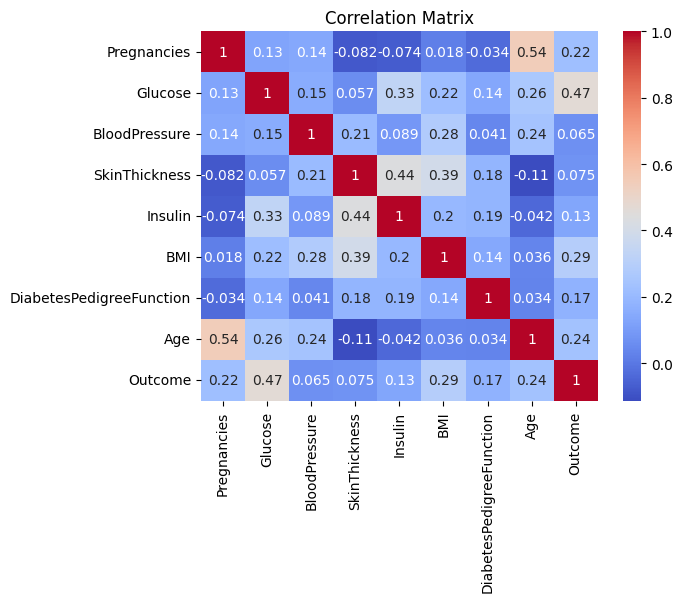

In [9]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()